# Практическая работа №2: Практическое применение дискретного преобразования Фурье с использованием библиотек Python для анализа речевых сигналов.

Выполнил студент гр. 9383 Камзолов Никита.

## Постановка задачи

1. Используя ДПФ построить траекторию основного тона ($F_0$) на записи своего голоса
2. Используя ДПФ построить траекторию второй, третьей и четвертой формантных частот на записи своего голоса.
3. Построить сонограмму по записи своего голоса.

## Выполнение работы

In [1]:
from scipy.io import wavfile
sound_rate, sound = wavfile.read('lab2.wav') #sound одномерный, поэтому будем рассматривать как массив

In [2]:
import matplotlib.pyplot as plt
import numpy as np

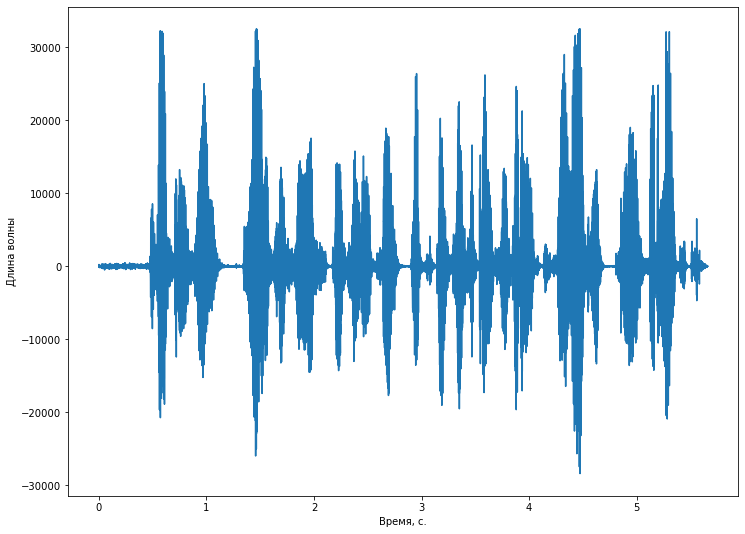

In [3]:
sound_time = sound.size / sound_rate
x = np.linspace(0, sound_time, sound.size)

plt.rcParams["figure.figsize"]=12, 9
plt.plot(x, sound)
plt.xlabel("Время, с.")
plt.ylabel("Длина волны")
plt.show()

### Построение траектории основного тона.

In [4]:
import math
N = 512
Fd = sound_rate 
Sr = round(Fd / N)
nl = int(80 / Sr)
nu = int(200 / Sr)

def FFT(interval):
    fft_interval = np.zeros(len(interval), dtype=complex)
    for i in range(len(interval)):
        for j in range(len(interval)):
            fft_interval[i] += interval[j] * np.exp(2 * np.pi * 1j / len(interval))**(-j*i)
    return fft_interval

In [5]:
intervals = []

for i in range(0, sound.size, N):
    if (i + N < sound.size):
        intervals.append(np.asarray(sound[i:i+N]))
    else: 
        intervals.append(np.asarray(sound[i:sound.size]))
intervals = np.array(intervals, dtype=object)
for i in range(len(intervals)):
    hamming = np.hamming(len(intervals[i]))
    intervals[i] = intervals[i] * hamming

In [6]:
fft_intervals = []
for i in range(len(intervals)):
    fft_intervals.append(FFT(intervals[i]))
fft_intervals = np.array(fft_intervals, dtype=object)

In [7]:
amplitude_spectre = np.zeros(len(fft_intervals), dtype=object)
for i in range(len(fft_intervals)):
    amplitude_spectre[i] = np.absolute(fft_intervals[i][:len(fft_intervals[0])//2])

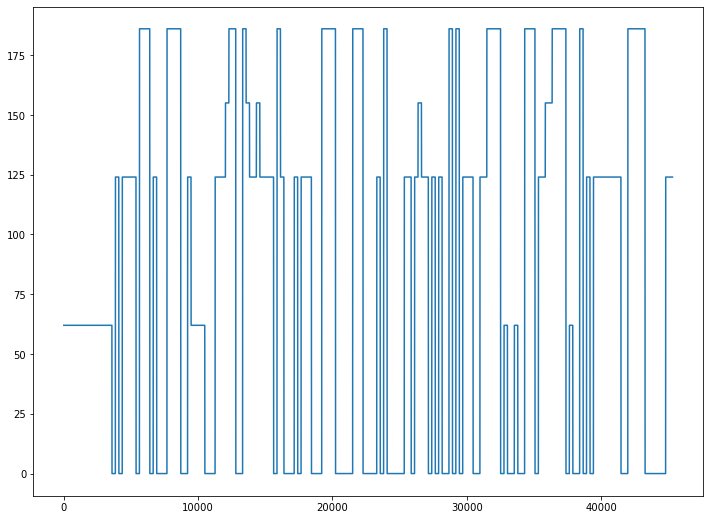

In [8]:
formant = []
main_freqs = []
for i in range(len(amplitude_spectre)):
    frame = amplitude_spectre[i][nl:nu+1]
    
    max_index = np.argmax(frame)
    mean_amplitude = np.mean(frame)

    if frame[max_index] > 2 * mean_amplitude:
        main_freq = nl + max_index
    else: 
        main_freq = 0
    main_freqs.append(main_freq)
    formant += [main_freq*Sr for i in range(len(amplitude_spectre[i]))]
plt.plot(formant)

In [9]:
mean = []
for item in formant:
    if (item > 0):
        mean.append(item)

print("Средняя частота: " + str(np.mean(mean)) +" Гц")

Средняя частота: 135.07142857142858 Гц


### Построение второй, третьей и четвертой формантных частот. 

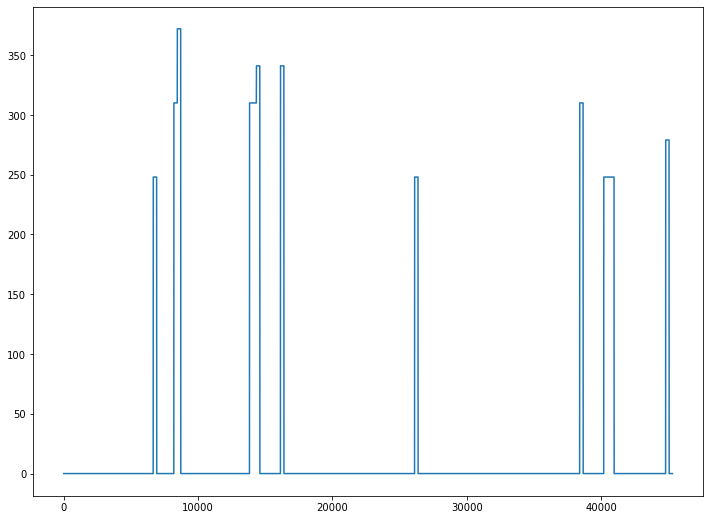

In [10]:
formant2 = []
for i in range(len(amplitude_spectre)):
    main_freq = main_freqs[i] 
    interval = amplitude_spectre [i]
    if (main_freq != 0):
        l = 2 * main_freq - (nu - nl) // 2
        h = l + (nu - nl) * 2 
        
        frame = amplitude_spectre[i][l:h]
        
        max_index = np.argmax(frame)
        mean_amplitude = np.mean(frame)
        
        if frame[max_index] > 2 * mean_amplitude:
            if frame[max_index] / interval[main_freq] < 1 - 0.2:
                formant_freq = l + max_index
            else:
                formant_freq = 0
        else: 
            formant_freq = 0

        formant2 += [formant_freq*Sr for j in range(len(interval))]
        
    else:
        formant2 += [0 for j in range(len(interval))]
plt.plot(formant2)

In [11]:
mean = []
for item in formant2:
    if (item > 0):
        mean.append(item)

print("Средняя частота: " + str(np.mean(mean)) +" Гц")

Средняя частота: 293.3076923076923 Гц


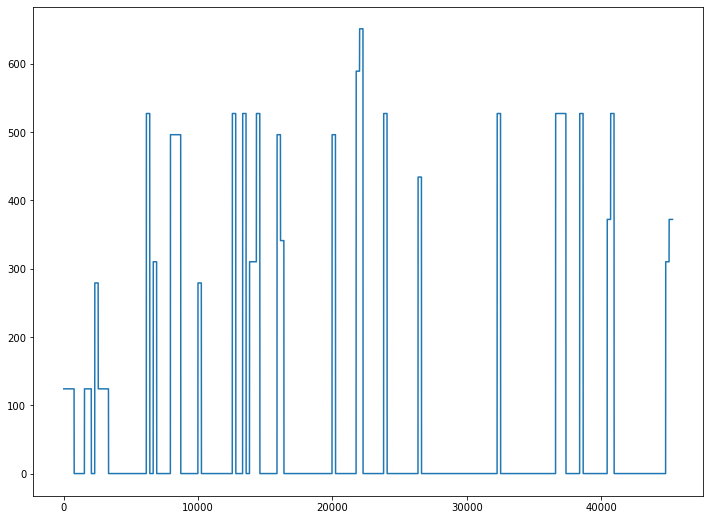

In [12]:
formant3 = []
for i in range(len(amplitude_spectre)):
    main_freq = main_freqs[i] 
    interval = amplitude_spectre [i]
    if (main_freq != 0):
        l = 3 * main_freq - (nu - nl) // 2
        h = l + (nu - nl) * 2 
        
        frame = amplitude_spectre[i][l:h]
        
        max_index = np.argmax(frame)
        mean_amplitude = np.mean(frame)
        
        if frame[max_index] > 2 * mean_amplitude:
            if frame[max_index] / interval[main_freq] < 1 - 0.3:
                formant_freq = l + max_index
            else:
                formant_freq = 0
        else: 
            formant_freq = 0

        formant3 += [formant_freq*Sr for j in range(len(interval))]
        
    else:
        formant3 += [0 for j in range(len(interval))]
plt.plot(formant3)

In [13]:
mean = []
for item in formant3:
    if (item > 0):
        mean.append(item)

print("Средняя частота: " + str(np.mean(mean)) +" Гц")

Средняя частота: 384.05555555555554 Гц


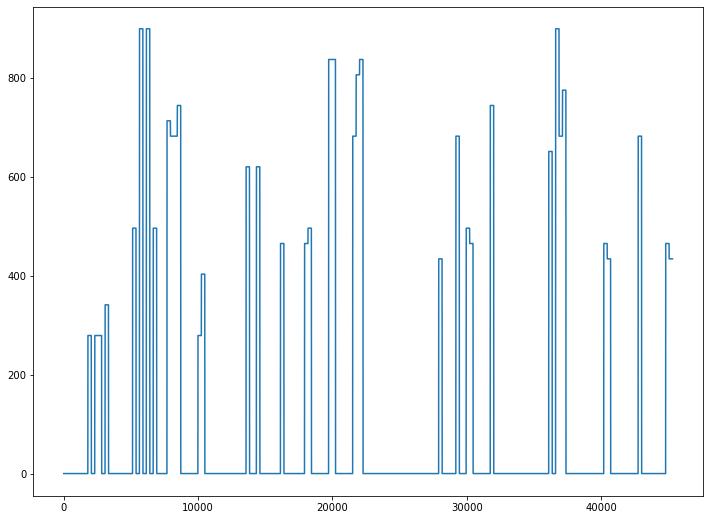

In [14]:
formant4 = []
for i in range(len(amplitude_spectre)):
    main_freq = main_freqs[i] 
    interval = amplitude_spectre [i]
    if (main_freq != 0):
        l = 4 * main_freq - (nu - nl) // 2
        h = l + (nu - nl) * 2 
        
        frame = amplitude_spectre[i][l:h]
        
        max_index = np.argmax(frame)
        mean_amplitude = np.mean(frame)
        
        if frame[max_index] > 2 * mean_amplitude:
            if frame[max_index] / interval[main_freq] < 1 - 0.4:
                formant_freq = l + max_index
            else:
                formant_freq = 0
        else: 
            formant_freq = 0

        formant4 += [formant_freq*Sr for j in range(len(interval))]
        
    else:
        formant4 += [0 for j in range(len(interval))]
plt.plot(formant4)

In [15]:
mean = []
for item in formant4:
    if (item > 0):
        mean.append(item)

print("Средняя частота: " + str(np.mean(mean)) +" Гц")

Средняя частота: 590.6315789473684 Гц


### Построение сонограммы.

In [17]:
sonogram = np.zeros((len(amplitude_spectre[0]),len(amplitude_spectre)))
for i in range(len(amplitude_spectre)):
    Amax = np.max(amplitude_spectre[i])
    
    temp = []
    for j in range(len(amplitude_spectre[i])):
        if j * Sr < 50:
            continue
        if j * Sr > 4000:
            continue
        sonogram[j][i] = amplitude_spectre[i][j] / Amax

Сонограмма:


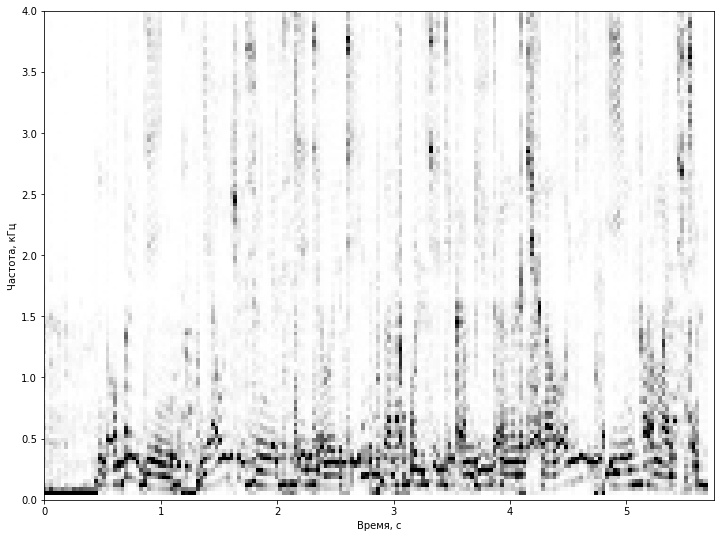

In [19]:
print("Сонограмма:")
plt.xlabel("Время, с")
plt.ylabel("Частота, кГц")
time = np.arange(len(sonogram[0])) / Sr
freqs = np.arange(len(sonogram)) * Sr / 1000
plt.ylim(top=4)
plt.xlim(right=5.75)
plt.pcolormesh(time, freqs, sonogram, cmap = plt.cm.gray_r, shading='auto')
plt.show()

### Вывод 
В ходе выполнения лабораторной работы были практически применено дискретное преобразование Фурье с использованием библиотек Python для анализа речевых сигналов.